In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df_online_shoppers_intention = pd.read_csv("online_shoppers_intention.csv")
df_online_shoppers_intention

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
#check for null values
null_values = df_online_shoppers_intention.isnull().sum()

#calculate percentage of null values
total_rows = len(df_online_shoppers_intention)
null_percentage = (null_values / total_rows) * 100

#create a dataframe to display null values and their percentage
null_df = pd.DataFrame({'Null values': null_values,
                       'NUll percentage': null_percentage})
null_df

,Null values,NUll percentage
Administrative,0,0.0
Administrative_Duration,0,0.0
Informational,0,0.0
Informational_Duration,0,0.0
ProductRelated,0,0.0
ProductRelated_Duration,0,0.0
BounceRates,0,0.0
ExitRates,0,0.0
PageValues,0,0.0
SpecialDay,0,0.0


In [10]:
# Encode the catgorical variables

df_cat=df_online_shoppers_intention.select_dtypes(include = 'object')

In [12]:
# performing encoding
df_cat = pd.get_dummies(df_cat, drop_first= True)
df_cat =df_cat.reset_index()

In [20]:
from sklearn.preprocessing import StandardScaler
# scal the numerical data
df_num = df_online_shoppers_intention.select_dtypes(include='number')
#intitate the Standerd scale
ss=StandardScaler()
#transform the data
scale=ss.fit_transform(df_num)

In [22]:
#creating dataframe 'df_scale' frome array 'scale'
df_scale =pd.DataFrame(scale,columns=df_num.columns)
#reseting index
df_scale =df_scale.reset_index()
df_scale.head()

,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629
1,1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182
2,2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735
3,3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289
4,4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289


In [24]:
# make a dataframe for independent variable
df_independant=pd.concat([df_scale,df_cat],axis=1)

### Find the optimal number of clusters.

In [33]:
model =KMeans(n_clusters = 3)
model

KMeans(n_clusters=3)

In [78]:
cluster_range = range(1,16)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 10)
    clusters.fit(df_independant)
    labels = clusters.labels_
    centroid = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame ({"Num_Clusters": cluster_range, "Cluster_Errors": cluster_errors})
cluster_df.Cluster_Errors = round(cluster_df.Cluster_Errors, 6)
cluster_df

,Num_Clusters,Cluster_Errors
0,1,3.124196e+11
1,2,7.810511e+10
2,3,3.471401e+10
3,4,1.952723e+10
4,5,1.249742e+10
5,6,8.680027e+09
6,7,6.377329e+09
7,8,4.882357e+09
8,9,3.857963e+09
9,10,3.125857e+09


In [79]:
cluster_df

,Num_Clusters,Cluster_Errors
0,1,3.124196e+11
1,2,7.810511e+10
2,3,3.471401e+10
3,4,1.952723e+10
4,5,1.249742e+10
5,6,8.680027e+09
6,7,6.377329e+09
7,8,4.882357e+09
8,9,3.857963e+09
9,10,3.125857e+09


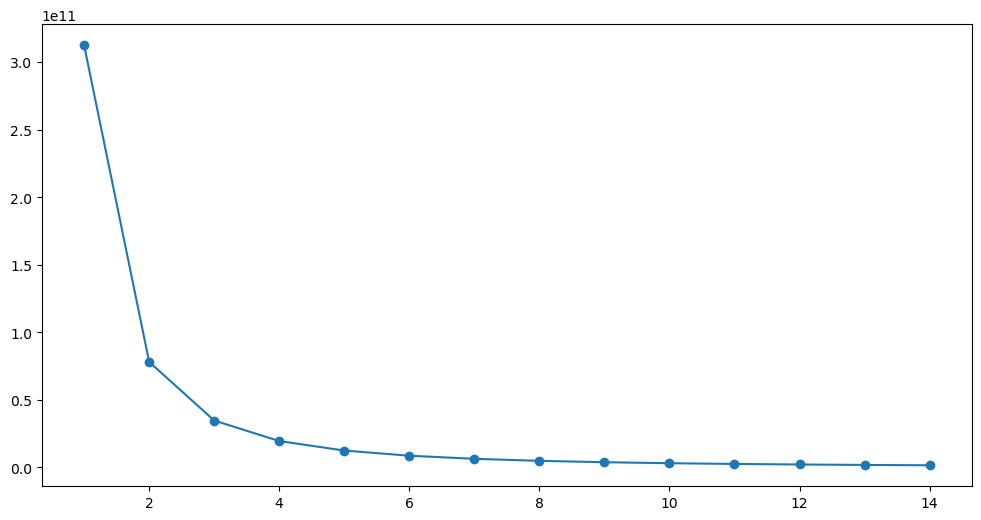

In [76]:
# visulize the cluster
plt.figure(figsize =(12,6))
plt.plot(cluster_df.Num_Clusters, cluster_df.Cluster_Errors, marker = 'o')
plt.show()     

In [84]:
# create clusters base on optimal number that we achive from elbow diagram
# k= 3

kmeans = KMeans(n_clusters = 3, n_init =15, random_state =2345)
kmeans.fit(df_independant)
centroids = kmeans.cluster_centers_
centroids 

array([[ 2.04750000e+03, -1.46846829e-01, -8.67408386e-02,
        -8.71945812e-02, -5.15157150e-02, -2.06693069e-01,
        -1.66357066e-01,  7.37434972e-02,  1.11648909e-01,
        -6.57325245e-02,  2.64618657e-01, -3.74884153e-02,
        -2.58282030e-02, -3.39148001e-02, -7.63067703e-02,
         2.04750000e+03,  8.57647287e-15,  4.49218750e-02,
         2.47718512e-15, -3.81639165e-17,  4.65576172e-01,
         4.89501953e-01,  4.55191440e-15, -1.83880688e-15,
         1.04083409e-15,  2.65412692e-16,  8.96728516e-01],
       [ 1.02675000e+04,  2.47658343e-02,  1.16273832e-02,
         7.92841345e-02,  5.08182341e-02,  2.01540370e-01,
         1.92011481e-01, -3.83408152e-02, -5.26943084e-02,
         4.18546148e-02, -3.08821366e-01,  6.02948714e-02,
         1.54388110e-02, -1.10796059e-02,  5.44622575e-02,
         1.02675000e+04,  3.96459748e-01,  1.07552856e-16,
         1.65145675e-15, -4.37150316e-16, -7.52176099e-15,
         1.04916076e-14,  6.03540252e-01, -9.99200722e-

In [90]:
# create, labels for the data 

centroid_df= pd.DataFrame(centroids, columns = list(df_independant))

centroid_df.index.name ='label'
centroid_df.reset_index()

,label,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,2047.5,-0.146847,-0.086741,-0.087195,-0.051516,-0.206693,-0.166357,0.073743,0.111649,...,4.492188e-02,2.477185e-15,-3.816392e-17,4.655762e-01,4.895020e-01,4.551914e-15,-1.838807e-15,1.040834e-15,2.654127e-16,0.896729
1,1,10267.5,0.024766,0.011627,0.079284,0.050818,0.201540,0.192011,-0.038341,-0.052694,...,1.075529e-16,1.651457e-15,-4.371503e-16,-7.521761e-15,1.049161e-14,6.035403e-01,-9.992007e-16,3.053113e-16,1.939864e-02,0.828080
2,2,6150.5,0.121496,0.074778,0.007343,0.000349,0.003762,-0.026875,-0.035021,-0.058395,...,-3.660267e-16,1.051095e-01,7.007299e-02,-4.773959e-15,3.306569e-01,1.238443e-01,1.335766e-01,1.090024e-01,1.216545e-03,0.842579


In [94]:
# create a new data frame only with the labels
df_labels = pd.DataFrame(kmeans.labels_,
                        columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
snail_df_labeled =df_independant.join(df_labels)
df_analysis = (snail_df_labeled.groupby(['labels'],axis= 0)).head(12330)
df_analysis

C:\Users\gaurav\AppData\Local\Temp\ipykernel_21308\3466838440.py:6: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_analysis = (snail_df_labeled.groupby(['labels'],axis= 0)).head(12330)
C:\Users\gaurav\AppData\Local\Temp\ipykernel_21308\3466838440.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_analysis = (snail_df_labeled.groupby(['labels'],axis= 0)).head(12330)


,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,labels
0,0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,...,False,False,False,False,False,False,False,False,True,0
1,1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,...,False,False,False,False,False,False,False,False,True,0
2,2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,...,False,False,False,False,False,False,False,False,True,0
3,3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,...,False,False,False,False,False,False,False,False,True,0
4,4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,...,False,False,False,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,...,False,False,False,False,False,False,False,False,True,1
12326,12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,...,False,False,False,False,True,False,False,False,True,1
12327,12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,...,False,False,False,False,True,False,False,False,True,1
12328,12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,...,False,False,False,False,True,False,False,False,True,1


In [96]:
df_analysis.labels.value_counts()

labels
1    4121
2    4109
0    4100
Name: count, dtype: int64

In [98]:
#visulize the clusters
sns.pairplot(df_analysis, hue = df_analysis.labels)

ValueError: Data must be 1-dimensional, got ndarray of shape (12330, 2) instead

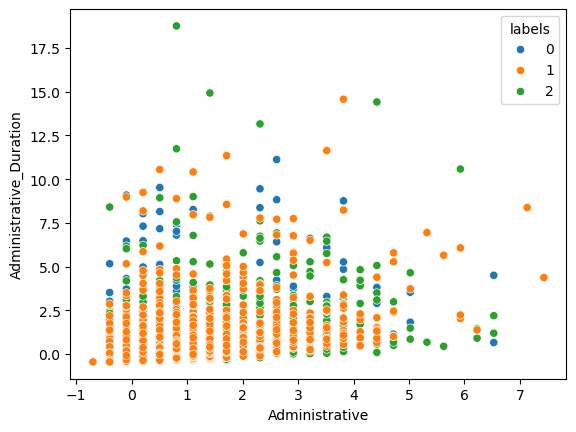

In [102]:
sns.scatterplot(x=df_analysis.Administrative,
                y=df_analysis.Administrative_Duration,
                hue=df_analysis.labels)
plt.show()